<a href="https://colab.research.google.com/github/pelinbalci/TF_Intro/blob/main/Exercise_6_Multi_class_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [ ]:
def get_data(filename):
  # The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
    with open(filename) as training_file:
      # Your code starts here
      # Your code ends here
        images = []
        labels = []
        # next(training_file)
        #reader = csv.reader(training_file)
        training_file.readline()
        for count,row in enumerate(training_file):
            row = row.split(",")
            label_row = row[0]
            label_row = np.array(label_row).astype(np.float)
            labels = np.append(labels, label_row)
            
            image_row = row[1:785]
            image_row = np.array(image_row).astype('float')
            image_row = np.array_split(image_row, 28)
            images.append(image_row)
            
            
    labels = np.array(labels).astype(float)
    images = np.array(images).astype(float)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)

training_images = np.expand_dims(training_images, axis=-1) # Your Code Here
testing_images = np.expand_dims(testing_images, axis=-1) # Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    # width_shift_range=0.2,
  # height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  # horizontal_flip=True,
  fill_mode='nearest'
    # Your Code Here
    )

testing_datagen = ImageDataGenerator(
    rescale = 1./255
    # Your Code Here
)

    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
]
    # Your Code Here
    )

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']
              # Your Code Here
             )

# Train the Model
history = model.fit_generator(
    training_datagen.flow(training_images,training_labels, 
                          batch_size = 8), 
    epochs=2, 
    validation_data = testing_datagen.flow(testing_images,testing_labels, 
                                           batch_size = 8), 
    verbose = 1, 
    # Your Code Here (set 'epochs' = 2)
)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
3432/3432 [==============================] - 154s 45ms/step - loss: 0.6643 - accuracy: 0.7878 - val_loss: 0.2328 - val_accuracy: 0.9165
Epoch 2/2
3432/3432 [==============================] - 157s 46ms/step - loss: 0.1108 - accuracy: 0.9625 - val_loss: 0.1748 - val_accuracy: 0.9498


[98.23133053795559, 0.8368656]

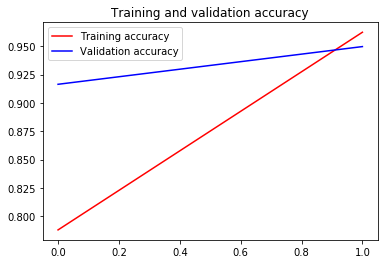

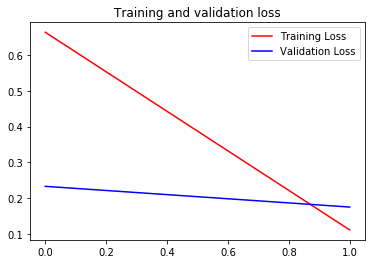

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy'] # Your Code Here
val_acc = history.history['val_accuracy']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()